In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('Student_performance_data _.csv')

In [21]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [22]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [23]:
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [24]:
df.dropna()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [25]:
df['Gender'].value_counts()

Gender
1    1222
0    1170
Name: count, dtype: int64

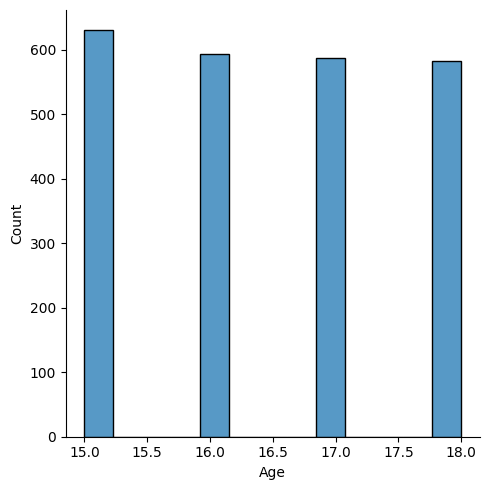

In [26]:
sns.displot(df['Age'])
plt.show()

<Axes: >

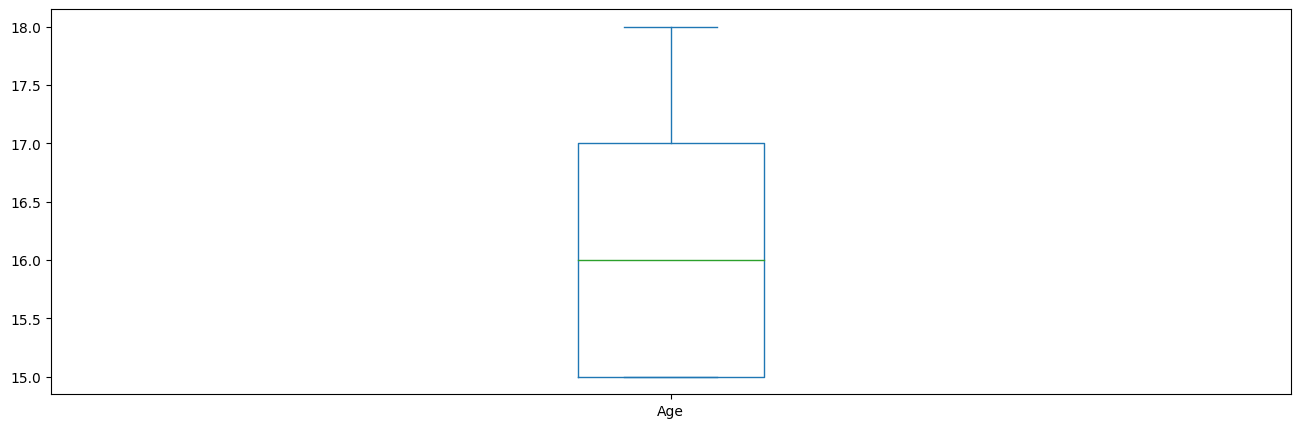

In [27]:
df['Age'].plot.box(figsize = (16,5))

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [29]:
df = df.drop(['ParentalSupport','ParentalEducation','Music','Sports'], axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudentID        2392 non-null   int64  
 1   Age              2392 non-null   int64  
 2   Gender           2392 non-null   int64  
 3   Ethnicity        2392 non-null   int64  
 4   StudyTimeWeekly  2392 non-null   float64
 5   Absences         2392 non-null   int64  
 6   Tutoring         2392 non-null   int64  
 7   Extracurricular  2392 non-null   int64  
 8   Volunteering     2392 non-null   int64  
 9   GPA              2392 non-null   float64
 10  GradeClass       2392 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 205.7 KB


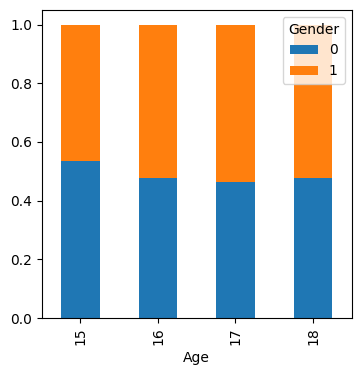

In [31]:
Gender = pd.crosstab(df['Age'],df['Gender'])
Gender.div(Gender.sum(1).astype(float),axis = 0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

<Axes: xlabel='Absences'>

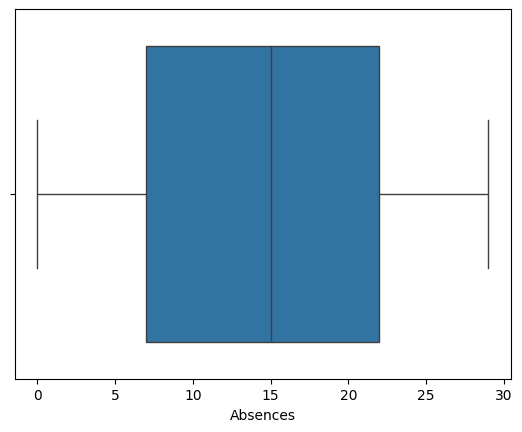

In [32]:
sns.boxplot(x=df['Absences'])

<Axes: xlabel='Absences', ylabel='Density'>

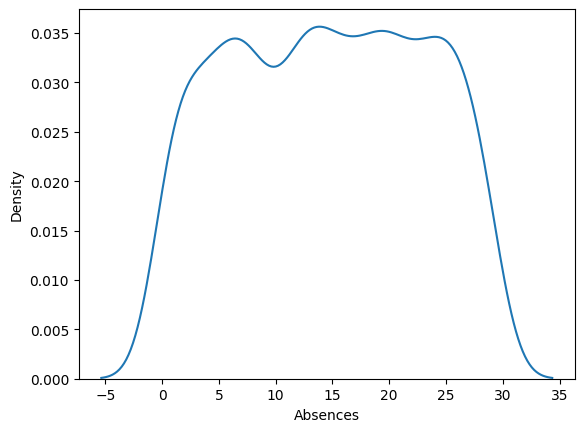

In [33]:
sns.kdeplot(x=df['Absences'])

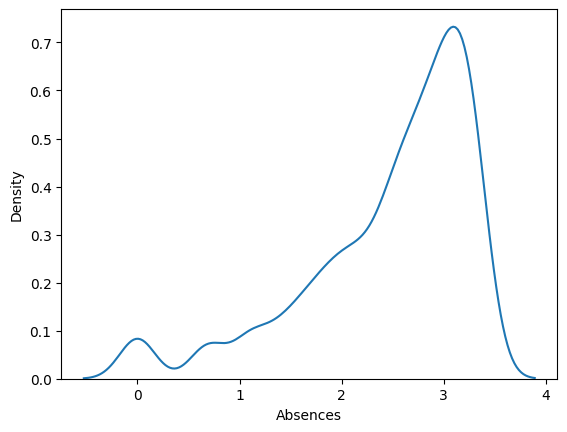

In [34]:
sns.kdeplot(x=np.log(df['Absences']));

In [35]:
df['Gender'].value_counts().to_dict()

{1: 1222, 0: 1170}

In [36]:
df['Gender'].replace({1:'male',0:'female'},inplace=True)

In [37]:
df

,StudentID,Age,Gender,Ethnicity,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Volunteering,GPA,GradeClass
0,1001,17,male,0,19.833723,7,1,0,0,2.929196,2.0
1,1002,18,female,0,15.408756,0,0,0,0,3.042915,1.0
2,1003,15,female,2,4.210570,26,0,0,0,0.112602,4.0
3,1004,17,male,0,10.028829,14,0,1,0,2.054218,3.0
4,1005,17,male,0,4.672495,17,1,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,male,0,10.680555,2,0,1,0,3.455509,0.0
2388,3389,17,female,0,7.583217,4,1,0,0,3.279150,4.0
2389,3390,16,male,0,6.805500,20,0,0,1,1.142333,2.0
2390,3391,16,male,1,12.416653,17,0,0,0,1.803297,1.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudentID        2392 non-null   int64  
 1   Age              2392 non-null   int64  
 2   Gender           2392 non-null   object 
 3   Ethnicity        2392 non-null   int64  
 4   StudyTimeWeekly  2392 non-null   float64
 5   Absences         2392 non-null   int64  
 6   Tutoring         2392 non-null   int64  
 7   Extracurricular  2392 non-null   int64  
 8   Volunteering     2392 non-null   int64  
 9   GPA              2392 non-null   float64
 10  GradeClass       2392 non-null   float64
dtypes: float64(3), int64(7), object(1)
memory usage: 205.7+ KB


In [39]:
df['Tutoring'].replace({1:'Yes',0:'No'},inplace=True)

In [40]:
df

,StudentID,Age,Gender,Ethnicity,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Volunteering,GPA,GradeClass
0,1001,17,male,0,19.833723,7,Yes,0,0,2.929196,2.0
1,1002,18,female,0,15.408756,0,No,0,0,3.042915,1.0
2,1003,15,female,2,4.210570,26,No,0,0,0.112602,4.0
3,1004,17,male,0,10.028829,14,No,1,0,2.054218,3.0
4,1005,17,male,0,4.672495,17,Yes,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,male,0,10.680555,2,No,1,0,3.455509,0.0
2388,3389,17,female,0,7.583217,4,Yes,0,0,3.279150,4.0
2389,3390,16,male,0,6.805500,20,No,0,1,1.142333,2.0
2390,3391,16,male,1,12.416653,17,No,0,0,1.803297,1.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudentID        2392 non-null   int64  
 1   Age              2392 non-null   int64  
 2   Gender           2392 non-null   object 
 3   Ethnicity        2392 non-null   int64  
 4   StudyTimeWeekly  2392 non-null   float64
 5   Absences         2392 non-null   int64  
 6   Tutoring         2392 non-null   object 
 7   Extracurricular  2392 non-null   int64  
 8   Volunteering     2392 non-null   int64  
 9   GPA              2392 non-null   float64
 10  GradeClass       2392 non-null   float64
dtypes: float64(3), int64(6), object(2)
memory usage: 205.7+ KB


In [42]:
df

,StudentID,Age,Gender,Ethnicity,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Volunteering,GPA,GradeClass
0,1001,17,male,0,19.833723,7,Yes,0,0,2.929196,2.0
1,1002,18,female,0,15.408756,0,No,0,0,3.042915,1.0
2,1003,15,female,2,4.210570,26,No,0,0,0.112602,4.0
3,1004,17,male,0,10.028829,14,No,1,0,2.054218,3.0
4,1005,17,male,0,4.672495,17,Yes,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,male,0,10.680555,2,No,1,0,3.455509,0.0
2388,3389,17,female,0,7.583217,4,Yes,0,0,3.279150,4.0
2389,3390,16,male,0,6.805500,20,No,0,1,1.142333,2.0
2390,3391,16,male,1,12.416653,17,No,0,0,1.803297,1.0


In [43]:
df = df.drop(['Ethnicity'], axis=1)

In [44]:
df = df.drop(['Volunteering'], axis=1)

In [45]:
df

,StudentID,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,GPA,GradeClass
0,1001,17,male,19.833723,7,Yes,0,2.929196,2.0
1,1002,18,female,15.408756,0,No,0,3.042915,1.0
2,1003,15,female,4.210570,26,No,0,0.112602,4.0
3,1004,17,male,10.028829,14,No,1,2.054218,3.0
4,1005,17,male,4.672495,17,Yes,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...
2387,3388,18,male,10.680555,2,No,1,3.455509,0.0
2388,3389,17,female,7.583217,4,Yes,0,3.279150,4.0
2389,3390,16,male,6.805500,20,No,0,1.142333,2.0
2390,3391,16,male,12.416653,17,No,0,1.803297,1.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudentID        2392 non-null   int64  
 1   Age              2392 non-null   int64  
 2   Gender           2392 non-null   object 
 3   StudyTimeWeekly  2392 non-null   float64
 4   Absences         2392 non-null   int64  
 5   Tutoring         2392 non-null   object 
 6   Extracurricular  2392 non-null   int64  
 7   GPA              2392 non-null   float64
 8   GradeClass       2392 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 168.3+ KB


In [47]:
df.isna().sum()

StudentID          0
Age                0
Gender             0
StudyTimeWeekly    0
Absences           0
Tutoring           0
Extracurricular    0
GPA                0
GradeClass         0
dtype: int64

In [48]:
new_df= df.sort_values('StudyTimeWeekly')

In [49]:
new_df

,StudentID,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,GPA,GradeClass
2011,3012,15,female,0.001057,4,Yes,0,2.968807,2.0
949,1950,15,male,0.004859,18,Yes,0,1.201053,4.0
87,1088,15,female,0.008031,27,No,0,0.000000,4.0
1330,2331,16,male,0.008206,26,No,1,0.264924,4.0
619,1620,17,male,0.014337,19,No,1,1.383528,4.0
...,...,...,...,...,...,...,...,...,...
1852,2853,16,male,19.939810,8,No,0,2.239254,3.0
422,1423,16,male,19.948459,7,No,0,3.112281,1.0
2169,3170,18,male,19.968425,24,No,0,0.906277,4.0
2215,3216,16,male,19.972346,18,No,1,1.879098,1.0


<Axes: >

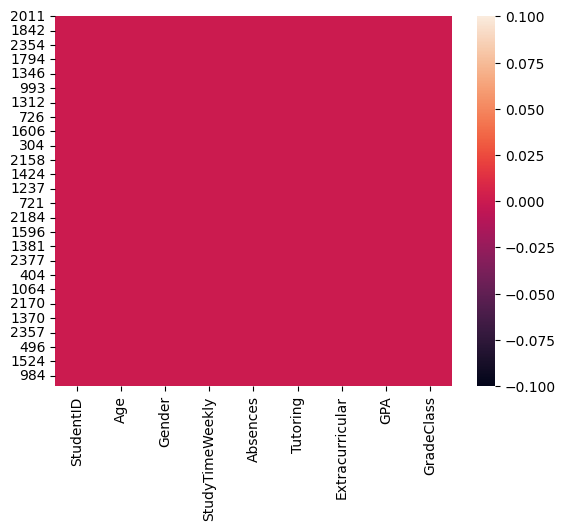

In [50]:
sns.heatmap(new_df.isna())

In [51]:
df['Absences'].mean()

14.54138795986622

In [52]:
df

,StudentID,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,GPA,GradeClass
0,1001,17,male,19.833723,7,Yes,0,2.929196,2.0
1,1002,18,female,15.408756,0,No,0,3.042915,1.0
2,1003,15,female,4.210570,26,No,0,0.112602,4.0
3,1004,17,male,10.028829,14,No,1,2.054218,3.0
4,1005,17,male,4.672495,17,Yes,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...
2387,3388,18,male,10.680555,2,No,1,3.455509,0.0
2388,3389,17,female,7.583217,4,Yes,0,3.279150,4.0
2389,3390,16,male,6.805500,20,No,0,1.142333,2.0
2390,3391,16,male,12.416653,17,No,0,1.803297,1.0


In [53]:
mean_No = df.groupby('Tutoring').get_group('No')['StudentID'].mean()

In [54]:
mean_No

2200.0532615200477

In [55]:
mean_Yes = df.groupby('Tutoring').get_group('Yes')['StudentID'].mean()

In [56]:
mean_Yes

2188.264909847434

In [57]:
df['Gender'].replace({'male':1,'female':0},inplace=True)

In [58]:
df

,StudentID,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,GPA,GradeClass
0,1001,17,1,19.833723,7,Yes,0,2.929196,2.0
1,1002,18,0,15.408756,0,No,0,3.042915,1.0
2,1003,15,0,4.210570,26,No,0,0.112602,4.0
3,1004,17,1,10.028829,14,No,1,2.054218,3.0
4,1005,17,1,4.672495,17,Yes,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,10.680555,2,No,1,3.455509,0.0
2388,3389,17,0,7.583217,4,Yes,0,3.279150,4.0
2389,3390,16,1,6.805500,20,No,0,1.142333,2.0
2390,3391,16,1,12.416653,17,No,0,1.803297,1.0


In [59]:
df.isna().mean()*100

StudentID          0.0
Age                0.0
Gender             0.0
StudyTimeWeekly    0.0
Absences           0.0
Tutoring           0.0
Extracurricular    0.0
GPA                0.0
GradeClass         0.0
dtype: float64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudentID        2392 non-null   int64  
 1   Age              2392 non-null   int64  
 2   Gender           2392 non-null   int64  
 3   StudyTimeWeekly  2392 non-null   float64
 4   Absences         2392 non-null   int64  
 5   Tutoring         2392 non-null   object 
 6   Extracurricular  2392 non-null   int64  
 7   GPA              2392 non-null   float64
 8   GradeClass       2392 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 168.3+ KB


In [61]:
df.dtypes

StudentID            int64
Age                  int64
Gender               int64
StudyTimeWeekly    float64
Absences             int64
Tutoring            object
Extracurricular      int64
GPA                float64
GradeClass         float64
dtype: object

In [82]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)

In [83]:
df['Tutoring'].fillna(df['Tutoring'].mode()[0],inplace = True)

In [84]:
df['StudyTimeWeekly'].fillna(df['StudyTimeWeekly'].mode()[0],inplace = True)

In [85]:
df['GPA'].fillna(df['GPA'].mode()[0],inplace = True)

In [86]:
df['GradeClass'].fillna(df['GradeClass'].mode()[0],inplace = True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudentID        2392 non-null   int64  
 1   Age              2392 non-null   int64  
 2   Gender           2392 non-null   int64  
 3   StudyTimeWeekly  2392 non-null   float64
 4   Absences         2392 non-null   int64  
 5   Tutoring         2392 non-null   int64  
 6   Extracurricular  2392 non-null   int64  
 7   GPA              2392 non-null   float64
 8   GradeClass       2392 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 168.3 KB


In [88]:
x = df.drop(['StudentID','Age'],axis=1)
y = df['Age']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=11,stratify = y)

In [89]:
x_train.isnull().sum()

Gender             0
StudyTimeWeekly    0
Absences           0
Tutoring           0
Extracurricular    0
GPA                0
GradeClass         0
dtype: int64

In [90]:
y_train.value_counts()

Age
15    504
16    474
17    469
18    466
Name: count, dtype: int64

In [91]:
df['Tutoring'].replace({'Yes':1,'No':0},inplace=True)

In [92]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

In [93]:
y_pred_log = log_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_log)
print('confusion matrix :\n',cnf_matrix)
acc_score_LR = accuracy_score(y_test,y_pred_log)
print("Accuracy Score : ",acc_score_LR)
clf_report = classification_report(y_test , y_pred_log)
print('classification_report : \n',clf_report)

confusion matrix :
 [[57 24 16 29]
 [59 20 21 19]
 [47 21 20 30]
 [54 17 23 22]]
Accuracy Score :  0.24843423799582465
classification_report : 
               precision    recall  f1-score   support

          15       0.26      0.45      0.33       126
          16       0.24      0.17      0.20       119
          17       0.25      0.17      0.20       118
          18       0.22      0.19      0.20       116

    accuracy                           0.25       479
   macro avg       0.24      0.24      0.23       479
weighted avg       0.24      0.25      0.24       479



In [94]:
y_pred_train_log = log_clf.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train_log)
print('confusion matrix :\n',cnf_matrix)
acc_score_LR = accuracy_score(y_train,y_pred_train_log)
print("Accuracy Score : ",acc_score_LR)
clf_report = classification_report(y_train,y_pred_train_log)
print('classification_report : \n',clf_report)

confusion matrix :
 [[266  74  61 103]
 [216  80  79  99]
 [213  73  88  95]
 [210  66  77 113]]
Accuracy Score :  0.2859383167799268
classification_report : 
               precision    recall  f1-score   support

          15       0.29      0.53      0.38       504
          16       0.27      0.17      0.21       474
          17       0.29      0.19      0.23       469
          18       0.28      0.24      0.26       466

    accuracy                           0.29      1913
   macro avg       0.28      0.28      0.27      1913
weighted avg       0.28      0.29      0.27      1913



In [105]:
 df.shape

(2392, 9)

In [104]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [100]:
print(X_train.shape)
print(X_test.shape)

(1913, 8)
(479, 8)


In [101]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()

In [102]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9123173277661796

In [106]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.918580375782881